In [3]:
import numpy as np
import matplotlib.pyplot as pyplot

In [14]:
# create a dataset with a given class distribution
from numpy import hstack, unique, vstack, where
from sklearn.datasets import make_blobs

def get_dataset(proportions):
  # determine the number of classes
  n_classes = len(proportions)
  # determine the number of examples to generate for each class
  largest = max([v for k,v in proportions.items()])
  n_samples = largest * n_classes
  # create dataset
  X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1,
      cluster_std=3)
  # collect the examples
  X_list, y_list = list(), list()
  for k,v in proportions.items():
    row_ix = np. where(y == k)[0]
    selected = row_ix[:v]
    X_list.append(X[selected, :])
    y_list.append(y[selected])
  return vstack(X_list), hstack(y_list)


def plot_dataset(X,y):
  # create scatter plot for samples from each class
  n_classes = len(unique(y))
  for class_value in range(n_classes):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)[0]
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
  # show a legend
  pyplot.legend()
  # show the plot
  pyplot.show()

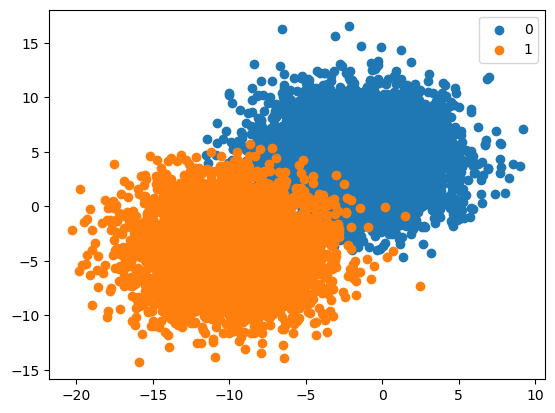

In [15]:
proportions = {0:5000, 1:5000}

# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

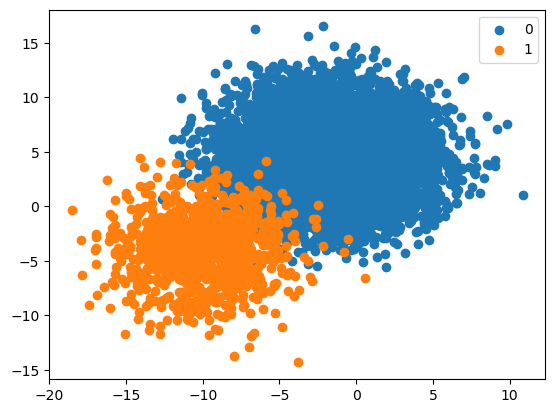

In [16]:
# define the class distribution
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

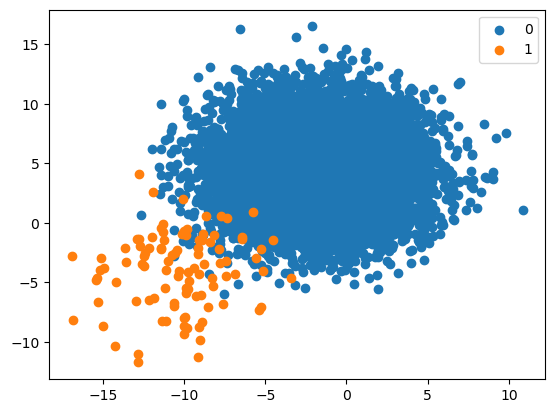

In [17]:
# define the class distribution
proportions = {0:10000, 1:100}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

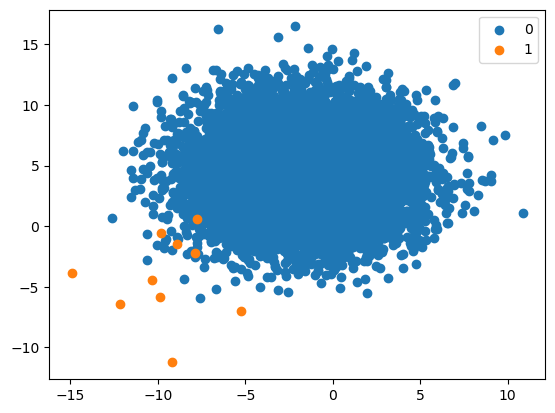

In [18]:
# define the class distribution
proportions = {0:10000, 1:10}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


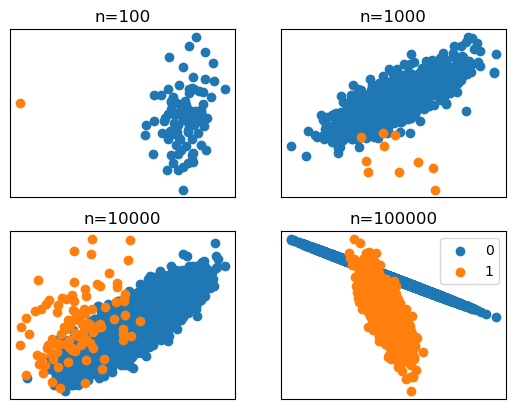

In [20]:
# vary the dataset size for a 1:100 imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# dataset sizes
sizes = [100, 1000, 10000, 100000]
# create and plot a dataset with each size
for i in range(len(sizes)):
  # determine the dataset size
  n = sizes[i]
  # create the dataset
  X, y = make_classification(n_samples=n, n_features=2, n_redundant=0,
      n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  # summarize class distribution
  counter = Counter(y)
  print('Size=%d, Ratio=%s' % (n, counter)) # define subplot
  pyplot.subplot(2, 2, 1+i) 
  pyplot.title('n=%d' % n) 
  pyplot.xticks([])
  pyplot.yticks([])
  
  # scatter plot of examples by class label 
  for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  
pyplot.legend()
# show the figure
pyplot.show()

Noise=0%, Ratio=Counter({0: 990, 1: 10})
Noise=1%, Ratio=Counter({0: 983, 1: 17})
Noise=5%, Ratio=Counter({0: 963, 1: 37})
Noise=7%, Ratio=Counter({0: 959, 1: 41})


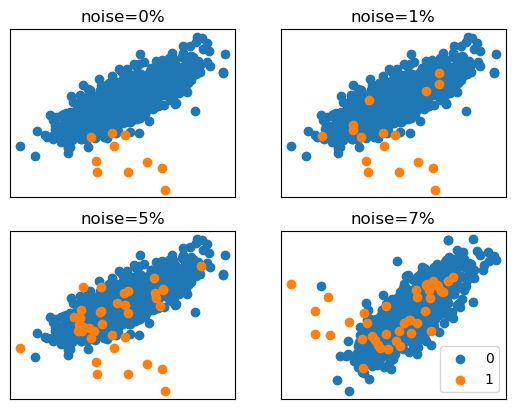

In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# label noise ratios
noise = [0, 0.01, 0.05, 0.07]
# create and plot a dataset with different label noise
for i in range(len(noise)):
  # determine the label noise
  n = noise[i]
  # create the dataset
  X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
      n_clusters_per_class=1, weights=[0.99], flip_y=n, random_state=1)
  # summarize class distribution
  counter = Counter(y)
  print('Noise=%d%%, Ratio=%s' % (int(n*100), counter)) # define subplot
  pyplot.subplot(2, 2, 1+i)
  pyplot.title('noise=%d%%' % int(n*100)) 
  pyplot.xticks([])
  pyplot.yticks([])
  # scatter plot of examples by class label
  for label, _ in counter.items():
      row_ix = where(y == label)[0]
      pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
# show the figure
pyplot.show()

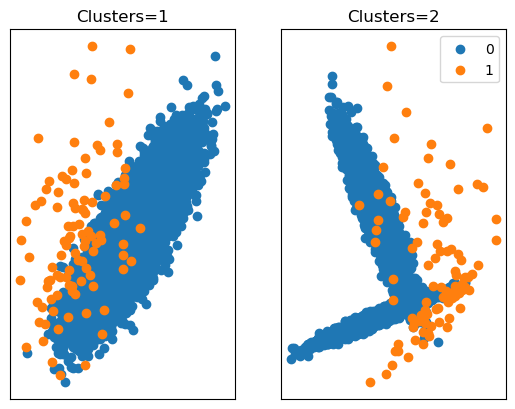

In [23]:
# vary the number of clusters for a 1:100 imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# number of clusters
clusters = [1, 2]
# create and plot a dataset with different numbers of clusters
for i in range(len(clusters)):
  c = clusters[i]
  # define dataset
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
      n_clusters_per_class=c, weights=[0.99], flip_y=0, random_state=1)
  counter = Counter(y)
  # define subplot
  pyplot.subplot(1, 2, 1+i) 
  pyplot.title('Clusters=%d' % c) 
  pyplot.xticks([]) 
  pyplot.yticks([])
  # scatter plot of examples by class label
  for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
# show the figure
pyplot.show()

In [25]:
from sklearn.dummy import DummyClassifier


model = DummyClassifier(strategy='most_frequent')

In [28]:
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


def evaluate_model(X, y, model):
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate the model on the dataset
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
  # return scores from each fold and each repeat
  return scores

In [29]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = DummyClassifier(strategy='most_frequent') # evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.2f%%' % (mean(scores) * 100))

Mean Accuracy: 99.00%


In [31]:

# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)] 
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro') 
print('Precision: %.3f' % precision)

Precision: 0.677


In [33]:

# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary') 
print('Recall: %.3f' % recall)


Recall: 0.900


In [34]:

# generate 2 class dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs') 
model.fit(trainX, trainy)

LogisticRegression()